In [46]:
import keras
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from PIL import Image
from tensorflow.keras.preprocessing import image
from typing import List, Dict

In [2]:
# from __future__ import division
# import cv2, os, glob, shutil
# import numpy as np
# import pandas as pd
# from collections import defaultdict
# from PIL import Image
# from random import choice
# import sys

# from keras.layers import Input, Dense, Dropout, Flatten
# from keras.models import Model, Sequential
# from keras import applications
# from keras import backend as K

In [67]:
def slide_image_window(original_path: str) -> List[str]:
    file_name = original_path.split('/')[-1] 
    new_folder_name = file_name[:file_name.rfind('.')] 

    test_image = Image.open(original_path)
    test_image = test_image.resize((300, 300))

    slided_paths = [] 

    image_number = 1 
    right = 150
    lower = 150

    for _ in range(49):
        cropped = test_image.crop((right-150, lower-150, right, lower))
        new_folder = os.path.join('./cropped/', new_folder_name)
        if not os.path.exists(new_folder):
            os.makedirs(new_folder)

        slided_path = os.path.join(new_folder, str(image_number) + "_" +  file_name)
        cropped.save(slided_path)
        slided_paths.append(slided_path.encode('utf-8'))
        right += 25
        image_number += 1
        if (image_number - 1) % 7 == 0:
            right = 150
            lower += 25
    return slided_paths

In [69]:
def predict_ingredients(slided_paths: List[str], model: keras.engine.functional.Functional) -> Dict[str, List[float]]:
    ingredients = defaultdict(list)

    for cropped_path in cropped_paths:
        img = image.load_img(cropped_path, target_size=(224, 224))
        print(type(img))
        img_array = image.img_to_array(img)
        img_array = np.array([img_array])

        prediction = model.predict(img_array)

        predicted_index = np.argmax(prediction)
        predicted_class_name = test_class_names[predicted_index]
        ingredients[predicted_class_name].append(prediction[:,predicted_index][0])

    return ingredients



In [70]:
img_path = '/Users/arina/study/ds/project/food_recommendation/photo2ingredients_data/grocery_store/custom_images/cucumber_tomato.jpg'
model = keras.models.load_model("photo2ingredients.h5")

In [71]:
ingredients = predict_ingredients(slide_image_window(img_path), model)
print(ingredients)

<class 'PIL.Image.Image'>
1/1 [==============================] - 1s 1s/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 71ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 66ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 81ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 81ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 48ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 70ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 53ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 54ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 61ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 43ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 48ms/step
<class 'PIL.Image.Image'>
1/1 [==============================] - 0

In [82]:
def mean_predicted_ingredients(ingredients_dict: Dict[str, List[float]]) -> Dict[str, float]:
    modified_ingredients = {key: sum(values) / len(values) for key, values in ingredients_dict.items()}
    return dict(sorted(modified_ingredients.items(), key=lambda item: item[1], reverse = True))
    

In [95]:
counted_ingredients = mean_predicted_ingredients(ingredients)
counted_ingredients

{'cucumber': 0.9319854180018107,
 'onion': 0.5972917079925537,
 'aubergine': 0.5573514699935913,
 'apple': 0.489500030875206,
 'table': 0.484272966782252,
 'mango': 0.4222739388545354,
 'tomato': 0.37359536190827686}

In [107]:
def ingredients_list(threshold: float, mean_ingredients: Dict[str, float]) -> List[str]:
    ingredients_list = []
    percent_sum = 0
    for ingredient, proporion in mean_ingredients.items():
        if proporion > threshold:
            ingredients_list.append(ingredient)
        else:
            break
    if 'table' in ingredients_list:
        ingredients_list.remove('table')
    return ingredients_list

In [109]:
result_ingredients = ingredients_list(0.6, counted_ingredients)
print(result_ingredients)

['cucumber']


In [6]:
file_name = img_path.split('/')[-1]
new_folder_name = file_name[:file_name.rfind('.')]
new_folder_name

'cucumber_tomato'

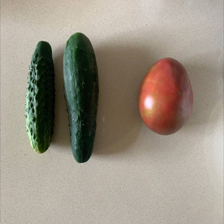

In [23]:
test_image = Image.open(img_path)
test_image = test_image.resize((300, 300))
test_image

In [24]:
cropped_paths = []

image_number = 1 
right = 150
lower = 150

In [25]:
for _ in range(49):
    cropped = test_image.crop((right-150, lower-150, right, lower))
    new_folder = os.path.join('./cropped/', new_folder_name)
    if not os.path.exists(new_folder):
        os.makedirs(new_folder)

    cropped_path = os.path.join(new_folder, str(image_number) + "_" +  file_name)
    cropped.save(cropped_path)
    cropped_paths.append(cropped_path.encode('utf-8'))

    right += 25
    image_number += 1

    if (image_number - 1) % 7 == 0:
        right = 150
        lower += 25


In [38]:
for cropped_path in cropped_paths:
    print('\n\n\n')
    img = image.load_img(cropped_path, target_size=(224, 224))
    print(type(img))
    img_array = image.img_to_array(img)
    img_array = np.array([img_array])

    prediction = model.predict(img_array)

    top_prediction = np.argsort(-prediction)[:,:1][0][0]
    print(top_prediction)
    corresponding_softmax = prediction[:,top_prediction][0]
    print(corresponding_softmax)
    
    predicted_index = np.argmax(prediction)

    print(predicted_index)
    # print(predicted_index)

    predicted_class_name = test_class_names[predicted_index]

    print(f"Predicted class: {predicted_class_name}")





<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 74ms/step
11
0.998398
11
Predicted class: cucumber




<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 76ms/step
11
0.9803356
11
Predicted class: cucumber




<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 98ms/step
29
0.26754558
29
Predicted class: onion




<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 51ms/step
22
0.29101682
22
Predicted class: mango




<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 55ms/step
22
0.3993302
22
Predicted class: mango




<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 51ms/step
22
0.26561168
22
Predicted class: mango




<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 46ms/step
29
0.24794878
29
Predicted class: onion




<class 'PIL.Image.Image'>
1/1 [==============================] - 0s 61ms/step
11
0.99964607
11
Predicted class: cucumber




<class 'PIL.Ima